# (연구&보람) 결과시각화 – Experiment 1

김보람  
2024-04-03

In [11]:
import pandas as pd
import numpy as np
#import sklearn
import pickle 
import time 
import datetime
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [12]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pd.options.plotting.backend = "plotly"
pio.templates.default = "plotly_white"

In [13]:
df = pd.read_csv('./240414_meged.csv')
df = df[['L2' not in l and 'L1' not in l for l in df.model]]
#df['diff'] = abs(merged_df['train_frate'] - merged_df['test_frate'])
df = df[(df.test_frate <= 0.005) & (0.009 < df.train_frate) & (df.train_frate < 0.51)]

In [15]:
df

,model,time,acc,pre,rec,f1,auc,graph_based,method,throw_rate,train_size,train_cols,train_frate,test_size,test_frate,hyper_params,theta,gamma
0,ECOD,0.003704,0.591404,0.003553,0.843750,0.007076,0.717359,False,pyod,0.097074,10010,['amt'],0.450350,37088,0.001726,NaN,NaN,NaN
1,GMM,0.082634,0.692003,0.003410,0.609375,0.006782,0.650760,False,pyod,0.097074,10010,['amt'],0.450350,37088,0.001726,NaN,NaN,NaN
2,HBOS,0.002123,0.936368,0.020868,0.781250,0.040650,0.858943,False,pyod,0.097074,10010,['amt'],0.450350,37088,0.001726,NaN,NaN,NaN
3,IForest,0.144727,0.815358,0.007263,0.781250,0.014393,0.798334,False,pyod,0.097074,10010,['amt'],0.450350,37088,0.001726,NaN,NaN,NaN
4,INNE,0.326223,0.766636,0.005070,0.687500,0.010065,0.727136,False,pyod,0.097074,10010,['amt'],0.450350,37088,0.001726,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13522,ExtraTreesEntr,NaN,0.994760,0.122807,0.241379,0.162791,0.763820,False,Autogluon,0.008901,500499,['amt'],0.009087,13741,0.002110,NaN,NaN,NaN
13523,NeuralNetFastAI,NaN,0.997890,0.000000,0.000000,0.000000,0.917705,False,Autogluon,0.008901,500499,['amt'],0.009087,13741,0.002110,NaN,NaN,NaN
13524,XGBoost,NaN,0.996580,0.178571,0.172414,0.175439,0.939455,False,Autogluon,0.008901,500499,['amt'],0.009087,13741,0.002110,NaN,NaN,NaN
13525,NeuralNetTorch,NaN,0.997162,0.187500,0.103448,0.133333,0.941711,False,Autogluon,0.008901,500499,['amt'],0.009087,13741,0.002110,NaN,NaN,NaN


In [19]:
fig = px.scatter(
    df,
    x='train_frate',y='auc',
    color='method',
    hover_data='f1',
    opacity=0.2,
    #---#
    width = 750,
    height = 800  
)
fig.data[3]['marker']['opacity'] = 0.7
fig.data[3]['marker']['size'] = 9
fig

ValueError: Value of 'hover_data_0' is not the name of a column in 'data_frame'. Expected one of ['model', 'time', 'acc', 'pre', 'rec', 'f1', 'auc', 'graph_based', 'method', 'throw_rate', 'train_size', 'train_cols', 'train_frate', 'test_size', 'test_frate', 'hyper_params', 'theta', 'gamma'] but received: f

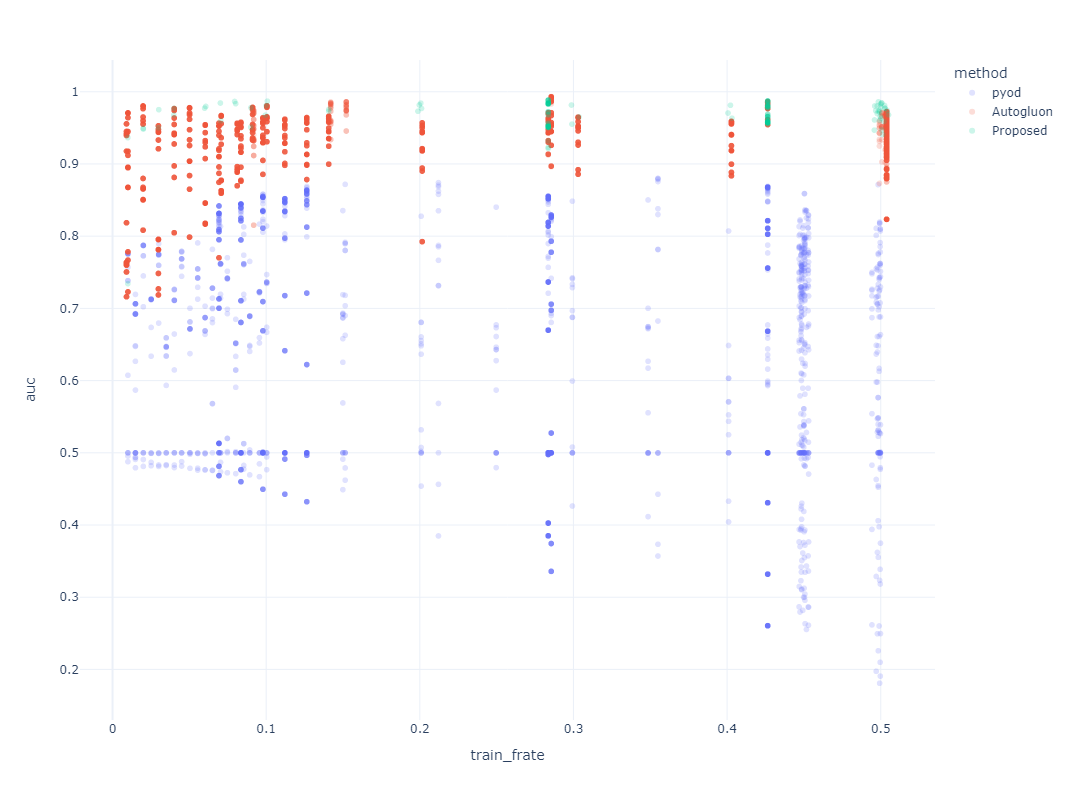

In [20]:
fig

In [22]:
df2 = pd.read_csv('./240414_meged.csv')
df2 = df[['L2' not in l and 'L1' not in l for l in df.model]]
#df['diff'] = abs(merged_df['train_frate'] - merged_df['test_frate'])
df3 = df2[(df2.test_frate <= 0.005) & (df2.train_frate <= 0.1)]

In [33]:
df3 = df3.drop_duplicates()

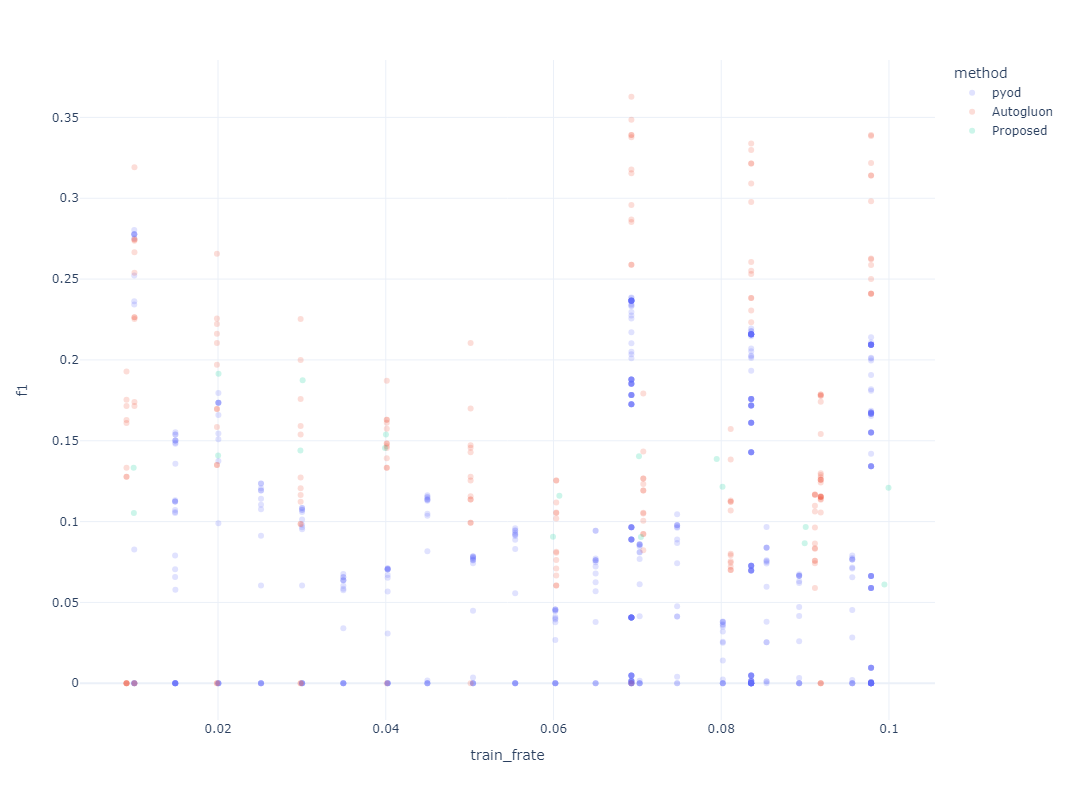

In [34]:
fig2 = px.scatter(
    df3,
    x='train_frate',y='f1',
    color='method',
#    hover_data='model',
    opacity=0.2,
    #---#
    width = 750,
    height = 800  
)
fig2